<a href="https://colab.research.google.com/github/gustschaefer/CIFAR-10-using-Keras/blob/master/Cifar_10_w_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Set GPU (using google colab)  & libraries

In [ ]:
import tensorflow as tf 
tf.test.gpu_device_name() 


'/device:GPU:0'

In [ ]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, AveragePooling2D, Flatten, Dropout, BatchNormalization
from keras.callbacks import TensorBoard
from keras.datasets import cifar10

#Importing Dataset - CIFAR10

In [ ]:
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

classes = len(np.unique(y_train))

#Plot images

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


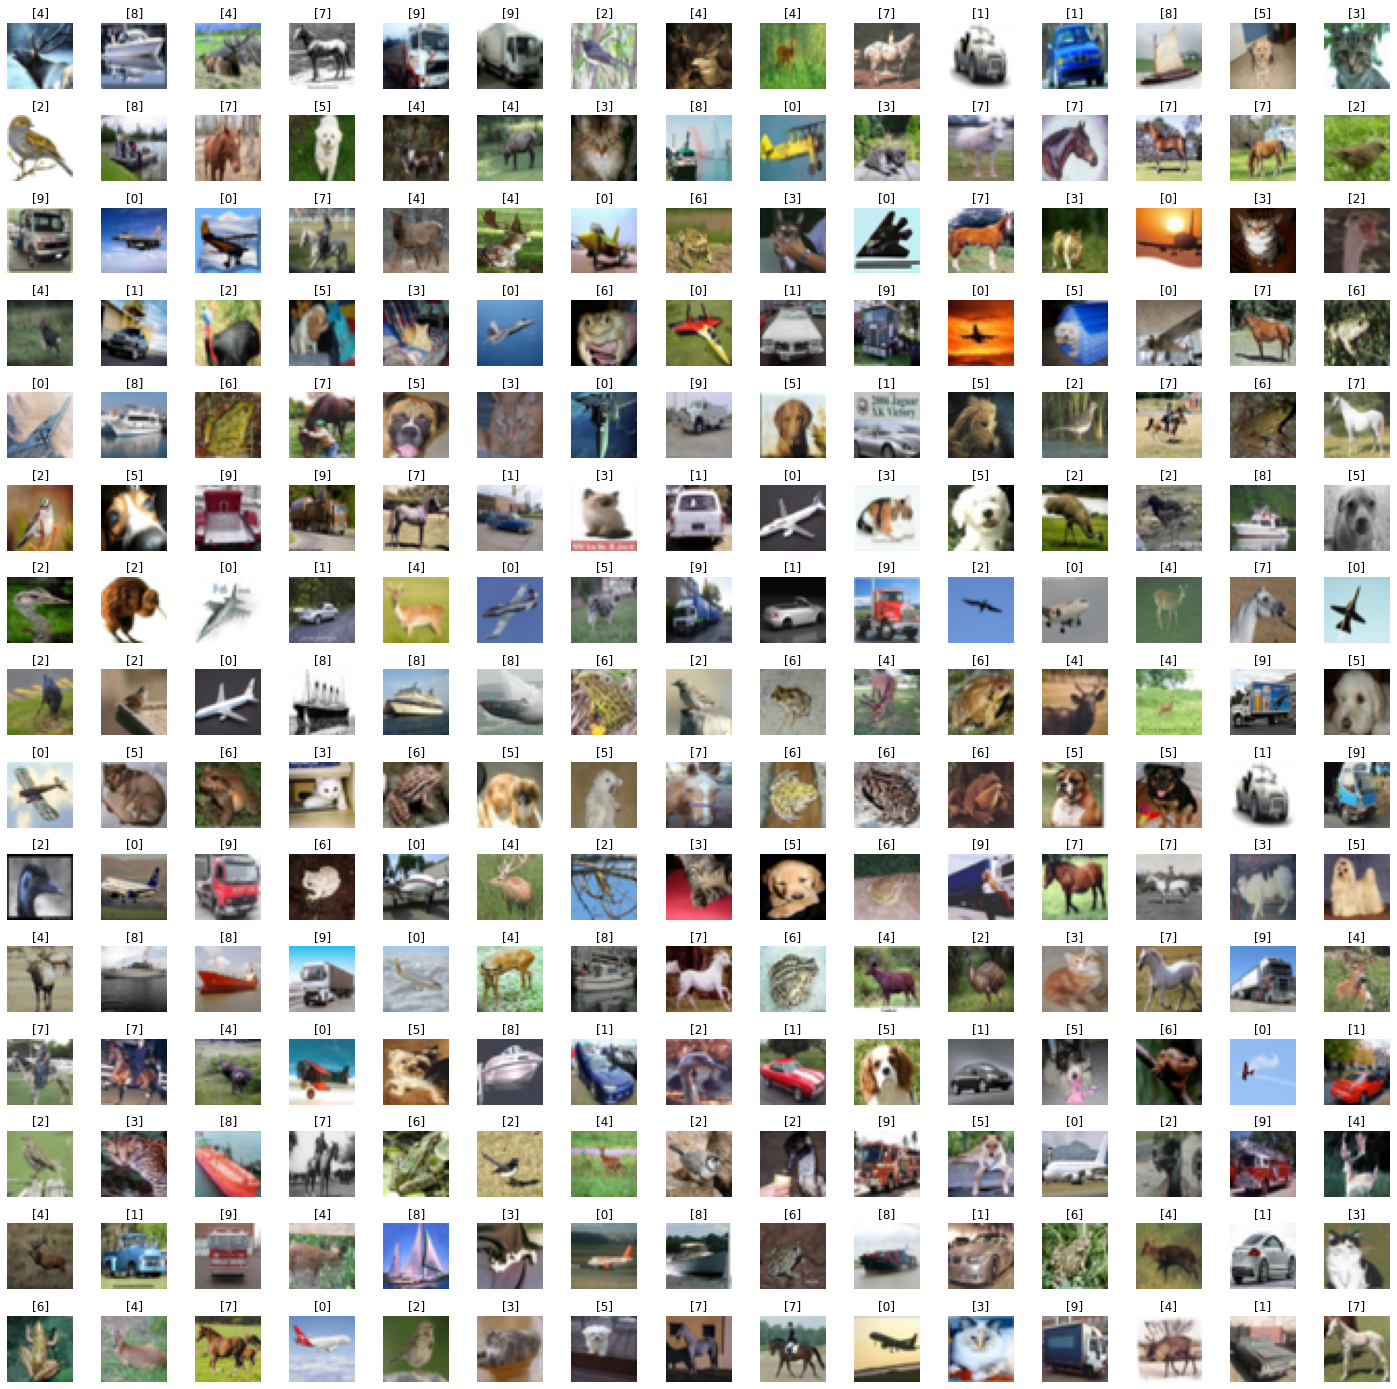

In [ ]:
L_grid = 15
W_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, len(X_train))
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

#Preparing data

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization
X_train = X_train/255
X_test = X_test/255

from keras.utils import to_categorical
y_train_hot = np.array(to_categorical(y_train))
y_test_hot = np.array(to_categorical(y_test))


In [ ]:
input_shape = X_train.shape[1:]
input_shape

(32, 32, 3)

#CNN model


In [ ]:
batch_size = 64
epochs = 50

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', 
                 input_shape=input_shape, padding='same'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(AveragePooling2D(2,2))

model.add(Dropout(0.5))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(AveragePooling2D(2,2))

model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(AveragePooling2D(2,2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

fit_hist = model.fit(X_train, y_train_hot, batch_size = batch_size,
                     epochs = epochs, shuffle=True, validation_data = (X_test, y_test_hot))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 31s 626us/step - loss: 0.2096 - accuracy: 0.9185 - val_loss: 0.1841 - val_accuracy: 0.9279
Epoch 2/50
50000/50000 [==============================] - 30s 596us/step - loss: 0.1481 - accuracy: 0.9416 - val_loss: 0.1418 - val_accuracy: 0.9439
Epoch 3/50
50000/50000 [==============================] - 30s 604us/step - loss: 0.1198 - accuracy: 0.9530 - val_loss: 0.1340 - val_accuracy: 0.9492
Epoch 4/50
50000/50000 [==============================] - 30s 595us/step - loss: 0.1020 - accuracy: 0.9600 - val_loss: 0.1320 - val_accuracy: 0.9505
Epoch 5/50
50000/50000 [==============================] - 30s 594us/step - loss: 0.0884 - accuracy: 0.9653 - val_loss: 0.1149 - val_accuracy: 0.9566
Epoch 6/50
50000/50000 [==============================] - 30s 595us/step - loss: 0.0748 - accuracy: 0.9713 - val_loss: 0.1155 - val_accuracy: 0.9584
Epoch 7/50
50000/50000 [==============================] 

#Model Evatualion

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


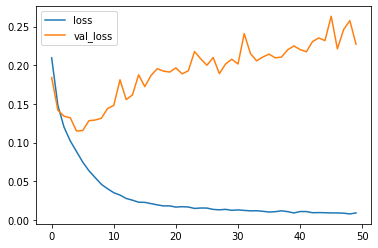

In [ ]:
print(fit_hist.history.keys())
plt.plot(fit_hist.history['loss'], label='loss')
plt.plot(fit_hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

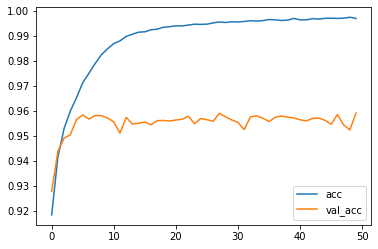

In [ ]:
plt.plot(fit_hist.history['accuracy'], label='acc')
plt.plot(fit_hist.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

#Image Augmentation & Fit the model again with the new generated images

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
imagedatagen = ImageDataGenerator(
                              rotation_range = 90,
                              width_shift_range = 0.1,
                              horizontal_flip = True,
                              vertical_flip = True,
                              brightness_range=(0,3)
                              )

In [ ]:
imagedatagen.fit(X_train)

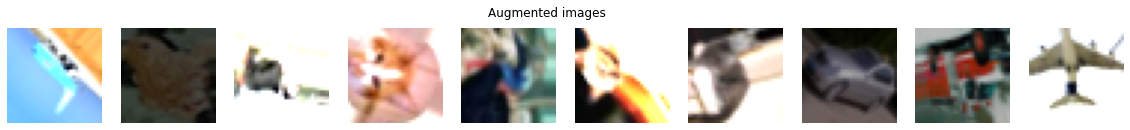

In [ ]:
n_samples = 10

from PIL import Image

fig = plt.figure(figsize = (20, 2))

for x_batch in imagedatagen.flow(X_train, batch_size = n_samples):
     for i in range(0, n_samples):
            ax = fig.add_subplot(1, n_samples, i+1)
            ax.imshow(Image.fromarray(np.uint8(x_batch[i])))
            ax.axis('off')
     fig.suptitle('Augmented images')
     plt.show()
     break

In [ ]:
model.fit_generator(imagedatagen.flow(X_train, y_train_hot, batch_size=batch_size), epochs = epochs)

Epoch 1/50
782/782 [==============================] - 58s 75ms/step - loss: 0.2803 - accuracy: 0.9028
Epoch 2/50
782/782 [==============================] - 59s 75ms/step - loss: 0.2433 - accuracy: 0.9085
Epoch 3/50
782/782 [==============================] - 59s 76ms/step - loss: 0.2327 - accuracy: 0.9116
Epoch 4/50
782/782 [==============================] - 59s 75ms/step - loss: 0.2235 - accuracy: 0.9147
Epoch 5/50
782/782 [==============================] - 59s 75ms/step - loss: 0.2186 - accuracy: 0.9163
Epoch 6/50
782/782 [==============================] - 59s 75ms/step - loss: 0.2127 - accuracy: 0.9186
Epoch 7/50
782/782 [==============================] - 59s 75ms/step - loss: 0.2085 - accuracy: 0.9198
Epoch 8/50
782/782 [==============================] - 58s 75ms/step - loss: 0.2053 - accuracy: 0.9209
Epoch 9/50
782/782 [==============================] - 58s 74ms/step - loss: 0.2021 - accuracy: 0.9222
Epoch 10/50
782/782 [==============================] - 58s 75ms/step - loss: 0.199

In [ ]:
model.evaluate(X_test, y_test_hot)

10000/10000 [==============================] - 3s 300us/step


[0.4966316411972046, 0.8207798004150391]

#Image Augmentation Example/Tests

In [ ]:
(X_train_aug, y_train_aug) , (X_test_aug, y_test_aug) = cifar10.load_data()

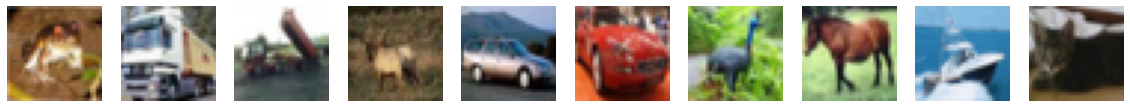

In [ ]:
X_train_sample = X_train_aug[:n_samples]
X_train_sample.shape

rows, columns = 1, 10

fig, axes = plt.subplots(rows, columns, figsize = (20, 20))
axes = axes.ravel()

for i in range(0, rows*columns):
  axes[i].imshow(X_train_sample[i])
  axes[i].axis('off')
  

In [ ]:
X_train_aug = X_train_aug.astype('float32')
X_test_aug = X_test_aug.astype('float32')

datagen_train = ImageDataGenerator(rotation_range=90)
datagen_train.fit(X_train_aug)

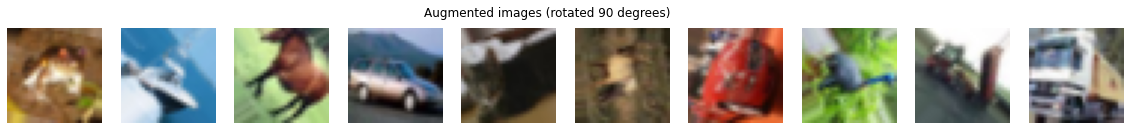

In [ ]:
fig = plt.figure(figsize = (20, 2))

for x_batch in datagen_train.flow(X_train_sample, batch_size = n_samples):
     for i in range(0, n_samples):
            ax = fig.add_subplot(1, n_samples, i+1)
            ax.imshow(Image.fromarray(np.uint8(x_batch[i])))
            ax.axis('off')
     fig.suptitle('Augmented images (rotated 90 degrees)')
     plt.show()
     break